In [2]:
import os
import cv2
import numpy as np
import csv
from scipy.optimize import minimize

# Function to determine the number of vertices in a contour
def count_vertices(contour):
    epsilon = 0.006 * cv2.arcLength(contour, True)  # Adjust epsilon for better accuracy
    approx = cv2.approxPolyDP(contour, epsilon, True)
    return len(approx)

# Function to calculate harmonic mean
def harmonic_mean(a, b):
    if a == 0 or b == 0:
        return 0
    return 2 / ((1 / a) + (1 / b))

# Function to determine the complexity level
def determine_complexity_level(combined_complexity):
    if combined_complexity < low_threshold:
        return "Low"
    elif combined_complexity < medium_threshold:
        return "Medium"
    else:
        return "High"

# Function to determine the complexity level based on both factors
def determine_complexity(vertices, hm):
    # Assign weights to each factor
    weights = np.array([0.2, 0.2, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1])  # Initial weights

    # Define the objective function to minimize (you can use accuracy or any other metric)
    def objective(weights):
        # Normalize values
        vertices_norm = vertices / 12  # Assuming 12 is the maximum number of vertices
        hm_norm = hm / 1.0  # Assuming 1.0 is the maximum harmonic mean value
        symmetries_norm = symmetries / 8  # Assuming 8 is the maximum number of symmetries
        axial_lines_norm = axial_lines / 8  # Assuming 8 is the maximum number of axial lines
        convex_spaces_norm = convex_spaces / 8  # Assuming 8 is the maximum number of convex spaces
        topological_holes_norm = topological_holes / 8  # Assuming 8 is the maximum number of topological holes
        convexity_norm = convexity / 1.0  # Assuming 1.0 is the maximum convexity value
        interconnection_density_norm = interconnection_density / 1.0  # Assuming 1.0 is the maximum interconnection density value

        # Combine the factors using the weighted sum
        combined_score = np.dot(weights, np.array([vertices_norm, hm_norm, symmetries_norm, axial_lines_norm,
                                                    convex_spaces_norm, topological_holes_norm, convexity_norm,
                                                    interconnection_density_norm]))

        # Calculate the difference from the target complexity level
        target_complexity = 0.5  # Example target complexity level (you can adjust this)
        return abs(combined_score - target_complexity)

    # Optimize the weights to minimize the objective function
    result = minimize(objective, weights, bounds=[(0, 1)] * len(weights))

    # Retrieve the optimized weights
    optimized_weights = result.x

    # Return the optimized weights
    return optimized_weights

# Define complexity thresholds
# Define complexity thresholds
low_threshold = 10 * 1e-5
medium_threshold = 1 * 1e-3

# Directory containing the images
data_dir = "E7-images"

# Create or open a CSV file to write the results
csv_file = "feature_hm.csv"
with open(csv_file, 'w', newline='') as file:
    writer = csv.writer(file)
    writer.writerow(["Image Filename", "Total Vertices", "Total Area", "Total Perimeter",
                     "Vertices/Area", "Vertices/Perimeter", "HM/Vertices", "Symmetries", "Axial Lines",
                     "Convex Spaces", "Topological Holes", "Convexity", "Interconnection Density",
                     "Combined Complexity", "Complexity Level"])

    # Loop through the image files in the directory
    for image_file in os.listdir(data_dir):
        if image_file.endswith((".jpg", ".png")):  # Check if the file is an image
            try:
                # Read the image
                image_path = os.path.join(data_dir, image_file)
                image = cv2.imread(image_path)

                if image is None:
                    print(f"Error reading image at {image_path}")
                    continue  # Skip to the next image

                # Convert the image to grayscale
                gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

                # Apply Gaussian blur to reduce noise
                blurred = cv2.GaussianBlur(gray, (5, 5), 0)

                # Apply Canny edge detection
                edges = cv2.Canny(blurred, 50, 150)

                # Find contours in the edge-detected image
                contours, _ = cv2.findContours(edges.copy(), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

                # Initialize total number of vertices, area, and perimeter for the image
                total_vertices = 0
                total_area = 0
                total_perimeter = 0
                symmetries = 0
                axial_lines = 0
                convex_spaces = 0
                topological_holes = 0
                convexity = 0
                interconnection_density = 0

                # Loop through detected contours and count vertices, calculate area and perimeter
                for contour in contours:
                    total_vertices += count_vertices(contour)
                    total_area += cv2.contourArea(contour)
                    total_perimeter += cv2.arcLength(contour, True)

                    # Additional calculations for symmetries, axial lines, convex spaces, topological holes, convexity, and interconnection density
                    # You need to implement these calculations based on your specific requirements

                # Calculate additional features
                vertices_area = total_vertices / total_area if total_area != 0 else 0
                vertices_perimeter = total_vertices / total_perimeter if total_perimeter != 0 else 0
                hm_vertices = harmonic_mean(vertices_area, vertices_perimeter)

                # Optimize the weights for combining factors
                optimized_weights = determine_complexity(total_vertices, hm_vertices)

                # Determine the combined complexity level using the optimized weights
                combined_complexity = np.dot(optimized_weights, np.array([vertices_area, hm_vertices, symmetries, axial_lines,
                                                                          convex_spaces, topological_holes, convexity,
                                                                          interconnection_density]))

                # Determine the complexity level
                complexity_level = determine_complexity_level(combined_complexity)

                # Write the filename, extracted features, and complexity to the CSV file
                writer.writerow([image_file, total_vertices, total_area, total_perimeter,
                                  vertices_area, vertices_perimeter, hm_vertices, symmetries, axial_lines,
                                  convex_spaces, topological_holes, convexity, interconnection_density,
                                  combined_complexity, complexity_level])

                # Print the complexity level of the image
                print(f"The complexity level of the image '{image_file}' is '{complexity_level}'.")
            except Exception as e:
                print(f"Error processing image {image_file}: {e}")


The complexity level of the image '0001.jpg' is 'Low'.
The complexity level of the image '0002.jpg' is 'Low'.
The complexity level of the image '0003.jpg' is 'Low'.
The complexity level of the image '0004.jpg' is 'Low'.
The complexity level of the image '0005.jpg' is 'Medium'.
The complexity level of the image '0006.jpg' is 'Low'.
The complexity level of the image '0007.jpg' is 'Low'.
The complexity level of the image '0008.jpg' is 'Low'.
The complexity level of the image '0009.jpg' is 'Low'.
The complexity level of the image '0010.jpg' is 'Low'.
The complexity level of the image '0011.jpg' is 'High'.
The complexity level of the image '0012.jpg' is 'Medium'.
The complexity level of the image '0013.jpg' is 'Low'.
The complexity level of the image '0014.jpg' is 'Medium'.
The complexity level of the image '0015.jpg' is 'Low'.
The complexity level of the image '0016.jpg' is 'Low'.
The complexity level of the image '0017.jpg' is 'Low'.
The complexity level of the image '0018.jpg' is 'Medium

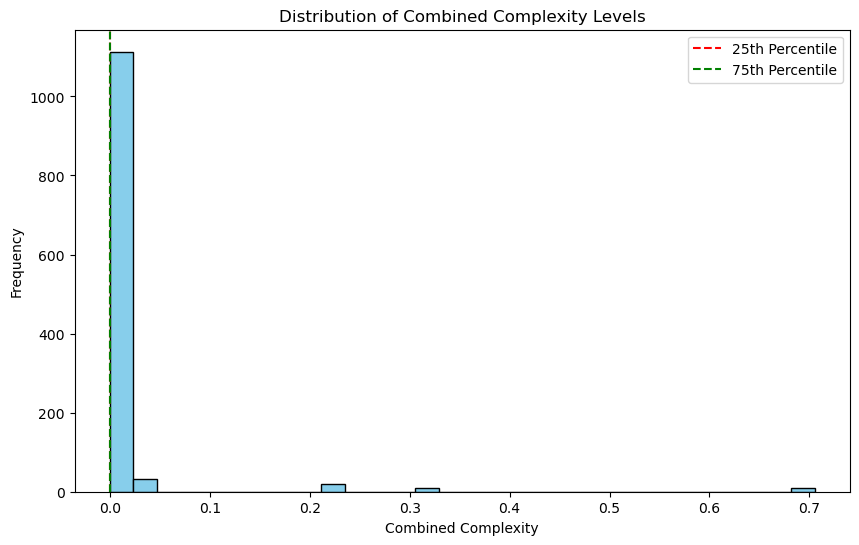

Low Complexity Threshold: 8.477446600933951e-05
High Complexity Threshold: 0.00011300125333872661
Image classification based on complexity categories:
     Image Filename  Combined Complexity Complexity Category
0          0001.jpg             0.000062      Low Complexity
1          0002.jpg             0.000064      Low Complexity
2          0003.jpg             0.000093   Medium Complexity
3          0004.jpg             0.000098   Medium Complexity
4          0005.jpg             0.000101   Medium Complexity
...             ...                  ...                 ...
1178       1179.jpg             0.223643     High Complexity
1179       1180.jpg             0.000116     High Complexity
1180       1181.jpg             0.000090   Medium Complexity
1181       1182.jpg             0.000062      Low Complexity
1182       1183.jpg             0.000138     High Complexity

[1183 rows x 3 columns]


In [1]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the CSV file containing the extracted features and combined complexity levels
csv_file = "feature_hm.csv"
data = pd.read_csv(csv_file)

# Analyze the distribution of combined complexity levels
complexity_stats = data['Combined Complexity'].describe()

# Calculate quartiles for reference in threshold determination
first_quartile = complexity_stats['25%']
third_quartile = complexity_stats['75%']

# Visualize the distribution of complexity levels using a histogram
plt.figure(figsize=(10, 6))
plt.hist(data['Combined Complexity'], bins=30, color='skyblue', edgecolor='black')
plt.axvline(first_quartile, color='red', linestyle='--', label='25th Percentile')
plt.axvline(third_quartile, color='green', linestyle='--', label='75th Percentile')
plt.xlabel('Combined Complexity')
plt.ylabel('Frequency')
plt.title('Distribution of Combined Complexity Levels')
plt.legend()
plt.show()

# Decide thresholds for low and high complexity levels
# You can adjust these thresholds based on the distribution plot and quartile values
low_threshold = first_quartile + 0.1 * (third_quartile - first_quartile)
high_threshold = third_quartile - 0.1 * (third_quartile - first_quartile)

print(f"Low Complexity Threshold: {low_threshold}")
print(f"High Complexity Threshold: {high_threshold}")

# Apply the thresholds to classify the images into low, medium, and high complexity categories
def classify_complexity(combined_complexity):
    if combined_complexity < low_threshold:
        return "Low Complexity"
    elif combined_complexity >= low_threshold and combined_complexity < high_threshold:
        return "Medium Complexity"
    else:
        return "High Complexity"

data['Complexity Category'] = data['Combined Complexity'].apply(classify_complexity)

# Save the updated data to a new CSV file
classified_csv_file = "feature_hm.csv"
data.to_csv(classified_csv_file, index=False)

# Display the classified data with complexity categories
print("Image classification based on complexity categories:")
print(data[['Image Filename', 'Combined Complexity', 'Complexity Category']])